# Imbalance 실습 

# 필요한 모듈 불러오기

In [53]:
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# 필요한 함수 정의 

# ~plot 함수

In [115]:
def plot_(X_resampled, y_resampled, remove = True):
    # visualization 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    if remove == True:

        idx_samples_removed = np.setdiff1d(np.arange(X_train.shape[0]),
                               idx_resampled)
    
        idx_class_0 = y_resampled == 0
        plt.scatter(X_resampled[idx_class_0, 0], X_resampled[idx_class_0, 1],
                    alpha=.5, label='Class #0')
        plt.scatter(X_resampled[~idx_class_0, 0], X_resampled[~idx_class_0, 1],
                    alpha=.5, label='Class #1')
        plt.scatter(X_train[idx_samples_removed, 0], X_train[idx_samples_removed, 1],
                    alpha=.5, label='Removed samples')
    
    else:    
        
        idx_class_0 = y_resampled == 0
        plt.scatter(X_resampled[idx_class_0, 0], X_resampled[idx_class_0, 1],
                    alpha=.5, label='Class #0')
        plt.scatter(X_resampled[~idx_class_0, 0], X_resampled[~idx_class_0, 1],
                    alpha=.5, label='Class #1')

    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-5, 5])
    #ax.set_ylim([-5, 5])
    
    #plt.title('Under-sampling using random under-sampling')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Create_Dataset 함수

In [45]:

def create_dataset(n_samples=1000, weights=(0.8, 0.2), n_classes=2,
                   class_sep=1, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

### Make_classification: Generate a random n-class classification problem.
### weights:The proportions of samples assigned to each class 
### n_informative : The number of informative features. 
### n_redundant:The number of redundant features. 
### n_clusters_per_class
### class_sep: Larger values spread out the clusters/classes and make the classification task easier. 

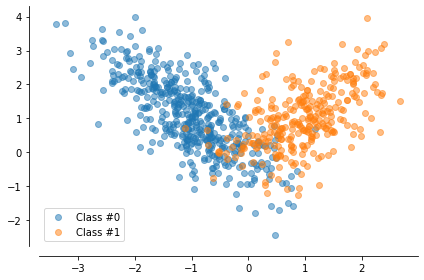

In [121]:
#############################################################################
## generate data set (standard normal distribution)

X_syn, y_syn = create_dataset(n_samples = 1000, weights = (0.6, 0.4))
X_train, X_test, y_train, y_test = train_test_split(X_syn,y_syn)

plot_(X_train, y_train, remove = False)

tree = DecisionTreeClassifier()
    
base_tree = tree.fit(X_train, y_train)
baseline = confusion_matrix(y_test, base_tree.predict(X_test))

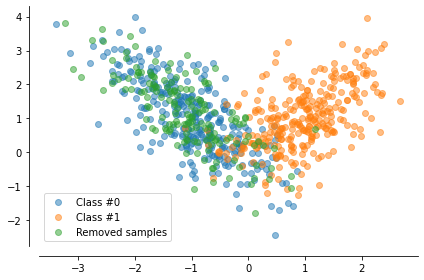

In [122]:
##############################################################################
### Ranom undersampling 
rus = RandomUnderSampler()
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

idx_resampled = rus.sample_indices_

#plot_(X_resampled, y_resampled_rus, remove = False)
plot_(X_resampled_rus, y_resampled_rus, remove = True)

rus_tree = tree.fit(X_resampled_rus, y_resampled_rus)
rus_ = confusion_matrix(y_test, rus_tree.predict(X_test))


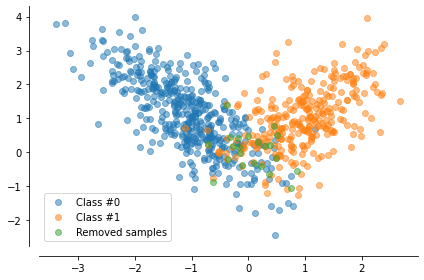

In [123]:
##############################################################################
### tomaek Links 
tl = TomekLinks(sampling_strategy='auto',)
X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)

idx_resampled = tl.sample_indices_

#plot_(X_resampled, y_resampled, remove = False)
plot_(X_resampled_tl, y_resampled_tl, remove = True)

tl_tree = tree.fit(X_resampled_tl, y_resampled_tl)
tl_ = confusion_matrix(y_test, tl_tree.predict(X_test))


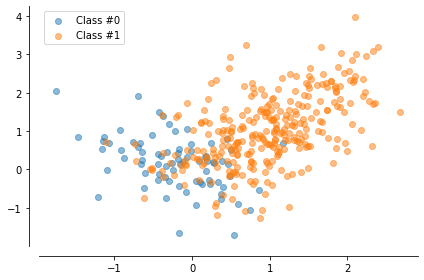

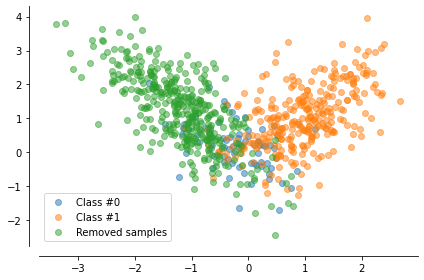

In [155]:
###############################################################################
### Condensed Nearest Neighbor
cnn = CondensedNearestNeighbour(random_state=120)

X_resampled, y_resampled  = cnn.fit_resample(X_train, y_train)

idx_resampled = cnn.sample_indices_

plot_(X_resampled, y_resampled, remove = False)
plot_(X_resampled, y_resampled, remove = True)

cnn_tree = tree.fit(X_resampled, y_resampled)
cnn_ = confusion_matrix(y_test, cnn_tree.predict(X_test))


E:\Anaconda3\lib\site-packages\imblearn\under_sampling\prototype_selection\one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)


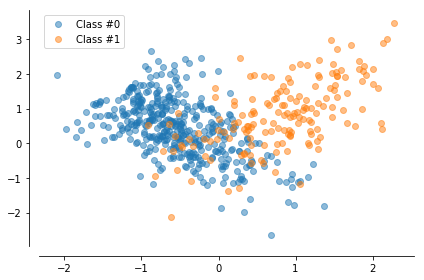

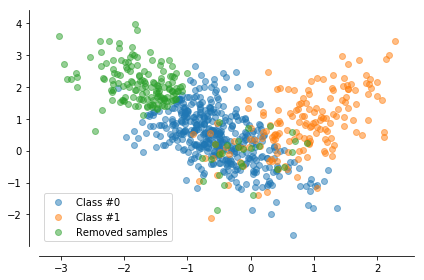

In [35]:
###############################################################################
### One-side selection
oss = OneSidedSelection(return_indices = True)
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X_train, y_train)

plot_(X_resampled, y_resampled, remove = False)
plot_(X_resampled, y_resampled, remove = True)

oss_tree = tree.fit(X_resampled, y_resampled)
oss_ = confusion_matrix(y_test, oss_tree.predict(X_test))


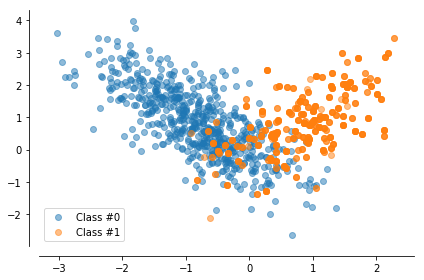

In [36]:
###############################################################################
### Random oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

plot_(X_resampled, y_resampled, remove = False)

ros_tree = tree.fit(X_resampled, y_resampled)
ros_ = confusion_matrix(y_test, ros_tree.predict(X_test))

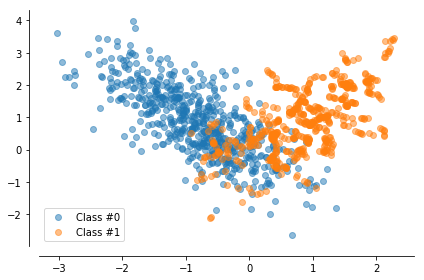

In [37]:
###############################################################################
### SMOTE ('regular')

sm = SMOTE(k_neighbors = 5, kind = 'regular')
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

plot_(X_resampled, y_resampled, remove = False)

sm_tree = tree.fit(X_resampled, y_resampled)
sm_ = confusion_matrix(y_test, sm_tree.predict(X_test))


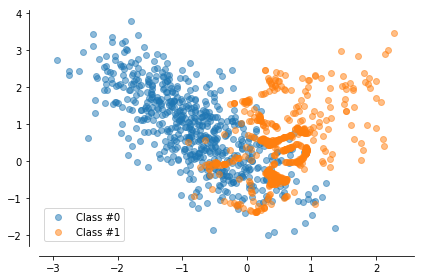

In [16]:
###############################################################################
### Borderline-SMOTE

sm_bl = SMOTE(k_neighbors = 5, m_neighbors = 2, kind = 'borderline1')
X_resampled, y_resampled = sm_bl.fit_sample(X_train, y_train)

plot_(X_resampled, y_resampled, remove = False)

bl_tree = tree.fit(X_resampled, y_resampled)
bl_ = confusion_matrix(y_test, bl_tree.predict(X_test))

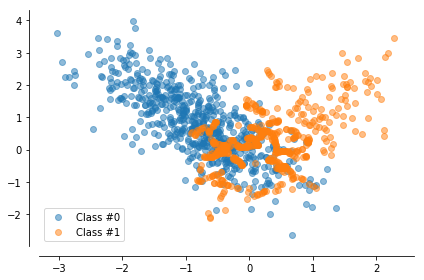

In [38]:
###############################################################################
### Borderline-SMOTE
adas = ADASYN(n_neighbors=3)
X_resampled, y_resampled = adas.fit_sample(X_train, y_train)

plot_(X_resampled, y_resampled, remove = False)

adas_tree = tree.fit(X_resampled, y_resampled)
adas_ = confusion_matrix(y_test, adas_tree.predict(X_test))

# Decision tree models comparison

In [39]:
## result _ baseline 
baseline

array([[196,  13],
       [ 14,  27]], dtype=int64)

In [40]:
## result _ undersampling 
print(rus_)
print(tl_)
print(cnn_)
print(oss_)

[[166  43]
 [  4  37]]
[[179  30]
 [ 12  29]]
[[172  37]
 [ 11  30]]
[[181  28]
 [ 12  29]]


In [41]:
## result _ oversampling 
print(ros_)
print(sm_)
print(bl_)
print(adas_)

[[195  14]
 [ 12  29]]
[[184  25]
 [ 10  31]]
[[185  24]
 [  8  33]]
[[182  27]
 [ 10  31]]
